Kütüphaneleri Yükleme ve Veriyi Hazırlama

X_train boyutu: (60000, 28, 28)
y_train boyutu: (60000,)
X_test boyutu: (10000, 28, 28)
y_test boyutu: (10000,)
Bir görüntünün boyutu: (28, 28)


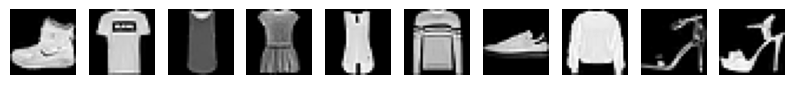

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Veri setini yükleme
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Veri setinin boyutlarını yazdırma
print(f"X_train boyutu: {X_train.shape}")
print(f"y_train boyutu: {y_train.shape}")
print(f"X_test boyutu: {X_test.shape}")
print(f"y_test boyutu: {y_test.shape}")

# Görüntülerin boyutlarını yazdırma
print(f"Bir görüntünün boyutu: {X_train[0].shape}")

# Görüntüleri görselleştirme
fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()

# Verileri normalize etme
X_train = X_train / 255.0
X_test = X_test / 255.0

# Veri setini yeniden şekillendirme (Flatten) - Makin öğrenmesi algoritmaları için
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

# Veri setini yeniden şekillendirme (YSA ve ESA için)
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

# Etiketleri kategorik hale getirme
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


Model Eğitim ve Değerlendirme Fonksiyonu

In [2]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        if hasattr(model, "predict_proba"):
            roc_auc = roc_auc_score(y_test_cat, model.predict_proba(X_test), multi_class='ovr')
        else:
            roc_auc = roc_auc_score(y_test_cat, model.predict(X_test), multi_class='ovr')

        cm = confusion_matrix(y_test, y_pred)

        print(f"{model_name} | Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
        return accuracy, precision, recall, f1, roc_auc, cm
    except Exception as e:
        print(f"Model: {model_name} encountered an error: {e}")
        return None, None, None, None, None, None


KNN Modeli

KNN | Accuracy: 0.8554, Precision: 0.8578, Recall: 0.8554, F1 Score: 0.8546, ROC AUC: 0.9685


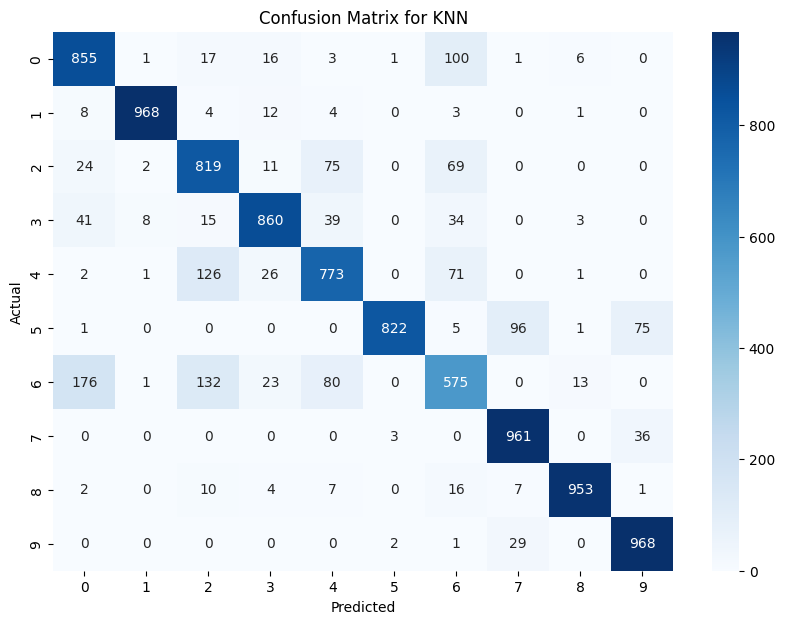

In [3]:
knn = KNeighborsClassifier()
accuracy, precision, recall, f1, roc_auc, cm = train_and_evaluate(knn, X_train_flat, y_train, X_test_flat, y_test, 'KNN')

if accuracy is not None:
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for KNN')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Decision Tree Modeli

Decision Tree | Accuracy: 0.7869, Precision: 0.7887, Recall: 0.7869, F1 Score: 0.7877, ROC AUC: 0.8816


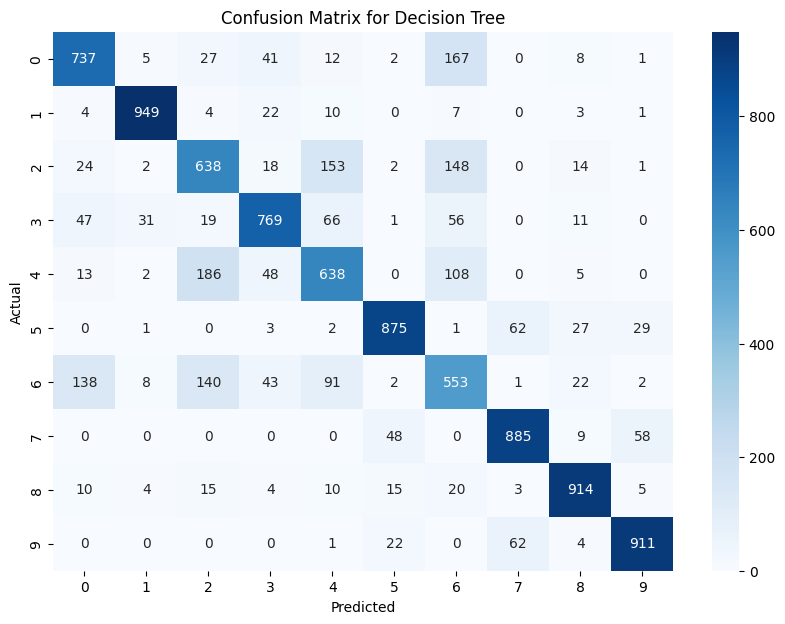

In [5]:
decision_tree = DecisionTreeClassifier()
accuracy, precision, recall, f1, roc_auc, cm = train_and_evaluate(decision_tree, X_train_flat, y_train, X_test_flat, y_test, 'Decision Tree')

if accuracy is not None:
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for Decision Tree')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Random Forest Modeli

Random Forest | Accuracy: 0.8749, Precision: 0.8738, Recall: 0.8749, F1 Score: 0.8735, ROC AUC: 0.9895


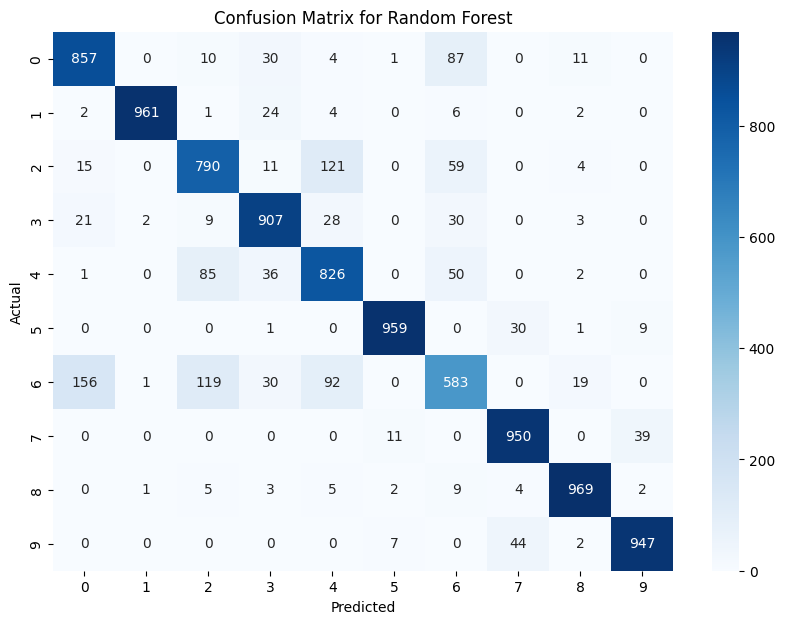

In [6]:
random_forest = RandomForestClassifier()
accuracy, precision, recall, f1, roc_auc, cm = train_and_evaluate(random_forest, X_train_flat, y_train, X_test_flat, y_test, 'Random Forest')

if accuracy is not None:
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for Random Forest')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Yapay Sinir Ağı (YSA) Modeli Eğitimi ve Değerlendirilmesi

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 6s 9ms/step - loss: 0.6049 - accuracy: 0.7913 - val_loss: 0.4757 - val_accuracy: 0.8304
Epoc

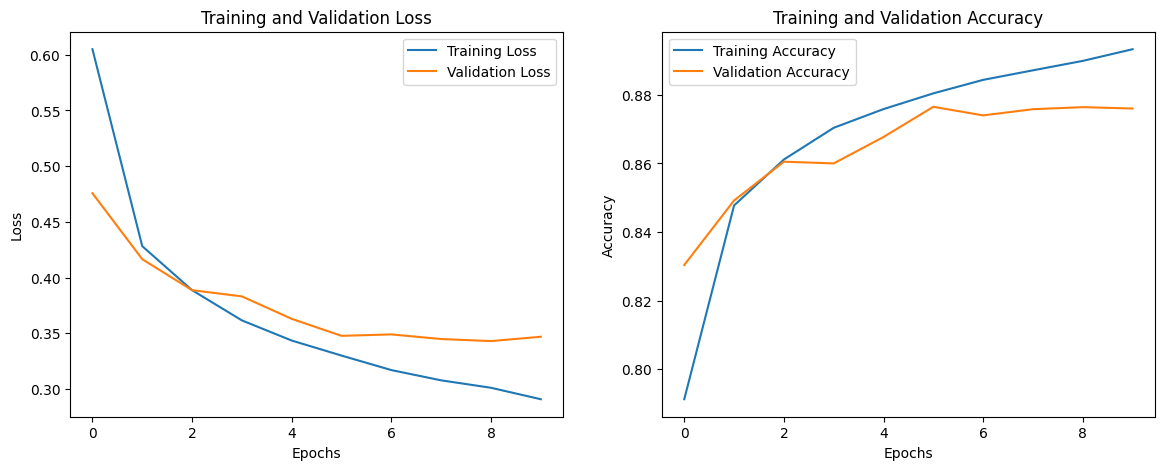

313/313 [==============================] - 1s 2ms/step
Neural Network | Accuracy: 0.8760, Precision: 0.8775, Recall: 0.8760, F1 Score: 0.8724, ROC AUC: 0.9899


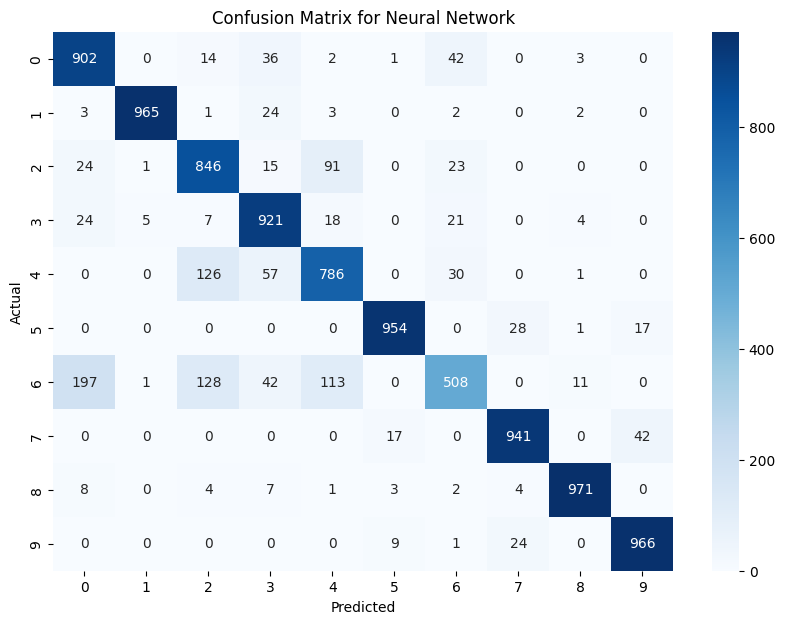

In [10]:
# Yapay Sinir Ağı (YSA) Modeli
model_nn = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Özeti
model_nn.summary()

# Modelin Eğitimi
history = model_nn.fit(X_train_reshaped, y_train_cat, epochs=10, batch_size=128, validation_data=(X_test_reshaped, y_test_cat), verbose=1)

# Eğitim Sonuçlarının Görselleştirilmesi
plt.figure(figsize=(14, 5))

# Kayıp Grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Doğruluk Grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

# Model Değerlendirme
def train_and_evaluate_nn(model, X_train, y_train, X_test, y_test, model_name):
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_test_labels, y_pred)
    precision = precision_score(y_test_labels, y_pred, average='weighted')
    recall = recall_score(y_test_labels, y_pred, average='weighted')
    f1 = f1_score(y_test_labels, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
    cm = confusion_matrix(y_test_labels, y_pred)

    print(f"{model_name} | Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
    return accuracy, precision, recall, f1, roc_auc, cm

accuracy, precision, recall, f1, roc_auc, cm = train_and_evaluate_nn(model_nn, X_train_reshaped, y_train_cat, X_test_reshaped, y_test_cat, 'Neural Network')

if accuracy is not None:
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for Neural Network')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Yapay Sinir Ağı (YSA) Modeli

313/313 [==============================] - 1s 2ms/step
Neural Network | Accuracy: 0.8785, Precision: 0.8811, Recall: 0.8785, F1 Score: 0.8789, ROC AUC: 0.9905


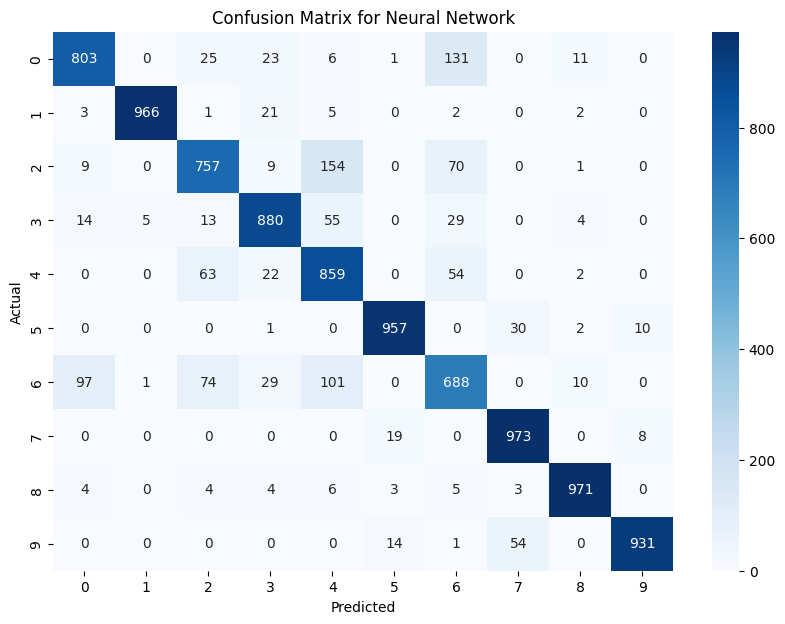

In [9]:
model_nn = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

def train_and_evaluate_nn(model, X_train, y_train, X_test, y_test, model_name):
    try:
        model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0, validation_data=(X_test, y_test))
        y_pred_probs = model.predict(X_test)
        y_pred = np.argmax(y_pred_probs, axis=1)
        y_test_labels = np.argmax(y_test, axis=1)
        accuracy = accuracy_score(y_test_labels, y_pred)
        precision = precision_score(y_test_labels, y_pred, average='weighted')
        recall = recall_score(y_test_labels, y_pred, average='weighted')
        f1 = f1_score(y_test_labels, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
        cm = confusion_matrix(y_test_labels, y_pred)

        print(f"{model_name} | Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
        return accuracy, precision, recall, f1, roc_auc, cm
    except Exception as e:
        print(f"Model: {model_name} encountered an error: {e}")
        return None, None, None, None, None, None

accuracy, precision, recall, f1, roc_auc, cm = train_and_evaluate_nn(model_nn, X_train_reshaped, y_train_cat, X_test_reshaped, y_test_cat, 'Neural Network')

if accuracy is not None:
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for Neural Network')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Bu kod parçacıkları, her bir modelin bağımsız olarak eğitilmesini ve değerlendirilmesini sağlar. Her modelin çıktısı kendi bloğunda hesaplanır ve görselleştirilir. Bu şekilde, herhangi bir model üzerinde değişiklik yaparken diğer modellerden bağımsız çalışabilir.
Birden fazla modeli eğitmek ve değerlendirmek çeşitli avantajlar sağlar:
1. Model Performansını Karşılaştırma
2. Model Çeşitliliği
3. Güvenilirlik
8. Veri Setinin Anlaşılması